# RESNET 101
source: https://www.kaggle.com/natevegh/pneumonia-detection-98-acc-fastai-2019-update

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
import os

In [3]:
model = models.resnet101
prefix = 'resnet101_512_'
size=512

In [4]:
bs = 64//4

In [5]:
path = Path()/'data'/'chest_xray'
path.ls()

[WindowsPath('data/chest_xray/data'),
 WindowsPath('data/chest_xray/test'),
 WindowsPath('data/chest_xray/train'),
 WindowsPath('data/chest_xray/val')]

torch.Size([3, 1225, 1632])


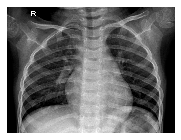

In [6]:
img = open_image(path/'val'/'NORMAL'/'NORMAL2-IM-1440-0001.jpeg')
print(img.data.shape)
img.show()

In [7]:
tfms = get_transforms()

In [8]:
np.random.seed(7)
data = ImageDataBunch.from_folder(path, 
                                  valid='val',
                                  valid_pct=0.2,
                                  size=size, bs=bs,
                                  ds_tfms=tfms).normalize(imagenet_stats)

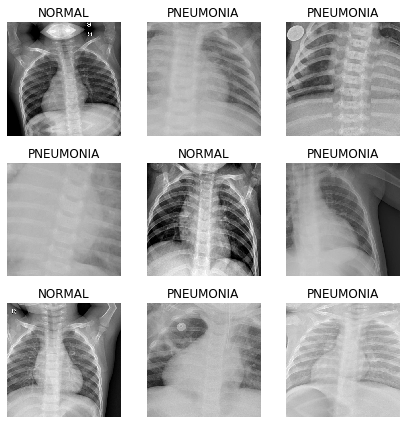

In [9]:
data.show_batch(3, figsize=(6,6))

In [10]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['NORMAL', 'PNEUMONIA'], 2, 4685, 1171)

> - we have a very small validation set so some augmentation is needed

In [26]:
learn = cnn_learner(data, model, metrics=error_rate, 
                    model_dir=(path/'models')).to_fp16()

In [12]:
#learn.fit(1)

In [13]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.260458,0.137995,0.053800,02:43
1,0.178461,0.110541,0.043553,02:30
2,0.137524,0.086744,0.036721,02:30
3,0.131448,0.087580,0.035013,02:31


In [ ]:
learn.save(prefix+'stage-1')

In [15]:
learn.unfreeze()

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


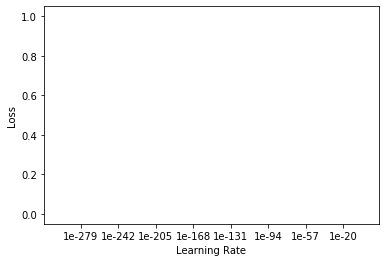

In [17]:
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(10, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.101168,0.116229,0.046968,02:57
1,0.141711,0.163668,0.068318,02:58
2,0.118975,0.101188,0.042699,02:57
3,0.134554,0.132654,0.058924,02:57
4,0.109067,0.076246,0.021349,02:58
5,0.090765,0.085222,0.032451,02:58
6,0.089117,0.058262,0.020495,02:57
7,0.072683,0.049523,0.016225,02:58
8,0.054594,0.051405,0.017933,02:58
9,0.041395,0.052234,0.017933,02:58


In [19]:
learn.save(prefix+'stage-2')

In [20]:
interp = ClassificationInterpretation.from_learner(learn)

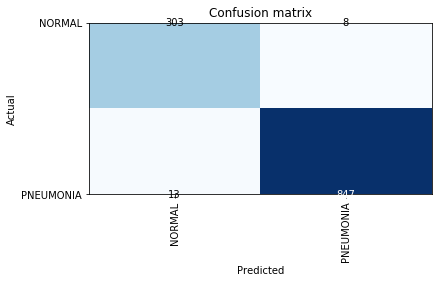

In [21]:
interp.plot_confusion_matrix()

In [22]:
learn.load(prefix+'stage-1')
learn.unfreeze()

In [23]:
learn.fit_one_cycle(30, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.122181,0.085540,0.031597,02:58
1,0.125584,0.071447,0.025619,02:57
2,0.123991,0.075540,0.033305,02:57
3,0.132468,0.086641,0.030743,02:58
4,0.103261,0.106588,0.035867,02:58
5,0.131030,0.067041,0.023057,02:58
6,0.156273,0.071129,0.027327,02:58
7,0.114692,0.075679,0.021349,02:58
8,0.115173,0.083512,0.031597,02:57
9,0.098521,0.100451,0.036721,02:58


In [24]:
learn.save(prefix+'stage-3')

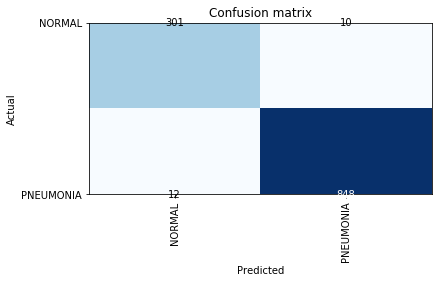

In [25]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()